In [11]:
import pandas as pd

df = pd.read_csv(r'C:\Users\clint\Desktop\RA Task\extracted_bidders_all.csv')
df

,project_number,bidder_name,address,city,state,zip,county,bidder_number,bid_amount,filename,awarded
0,180003,RONYAK PAVING INC,14376 N CHESHIRE ST,BURTON,OH,44021,Geauga,1,2087863.70,180003bidtab.pdf,True
1,180003,SHELLY & SANDS INC,1515 HARMON AVE,COLUMBUS,OH,43223,Franklin,2,2193929.12,180003bidtab.pdf,False
2,180003,KOSKI CONSTRUCTION CO,P O BOX 1038,ASHTABULA,OH,44005-1038,NaN,3,2268022.35,180003bidtab.pdf,False
3,180003,KOKOSING CONSTRUCTION COMPANY INC,886 MC KINLEY AVE,COLUMBUS,OH,43222,Franklin,4,2298511.32,180003bidtab.pdf,False
4,180003,CHAGRIN VALLEY PAVING INC,17290 MUNN RD,CHAGRIN FALLS,OH,44023,Geauga,5,2400000.00,180003bidtab.pdf,False
...,...,...,...,...,...,...,...,...,...,...,...
592,188000,M & B ASPHALT CO INC,1525 WEST COUNTY RD #42,TIFFIN,OH,44883,Seneca,1,918732.90,188000bidtab.pdf,True
593,188000,BLUFFTON PAVING INC,P O BOX 26,BLUFFTON,OH,45817,Allen,3,984896.65,188000bidtab.pdf,False
594,188000,SHELLY COMPANY,80 PARK DR BOX 266,THORNVILLE,OH,43076,Perry,4,988535.87,188000bidtab.pdf,False
595,188001,SHELLY COMPANY,80 PARK DR BOX 266,THORNVILLE,OH,43076,Perry,1,2049892.28,188001bidtab.pdf,True


In [12]:
# Basic data exploration
print(f"Total number of records: {len(df)}")
print(f"Number of unique projects: {df['project_number'].nunique()}")
print(f"Number of unique bidders: {df['bidder_name'].nunique()}")

# Check basic statistics about bid amounts
print("\nBid Amount Summary Statistics:")
print(df['bid_amount'].describe())

# Check how many bids were awarded
print(f"\nTotal number of awarded contracts: {df['awarded'].sum()}")
print(f"Percentage of awarded bids: {df['awarded'].mean()*100:.2f}%")

Total number of records: 597
Number of unique projects: 202
Number of unique bidders: 43

Bid Amount Summary Statistics:
count    5.970000e+02
mean     2.318731e+06
std      2.116537e+06
min      1.269695e+05
25%      1.020800e+06
50%      1.727152e+06
75%      3.185152e+06
max      1.792599e+07
Name: bid_amount, dtype: float64

Total number of awarded contracts: 202
Percentage of awarded bids: 33.84%


We see the numbers are inline with our expecations. 

Average number of bidders per project: 2.96
Min number of bidders: 1
Max number of bidders: 11

Distribution of the number of bidders per project:
num_bidders
1     36
2     75
3     33
4     20
5     14
6     11
7     11
8      1
11     1
Name: count, dtype: int64


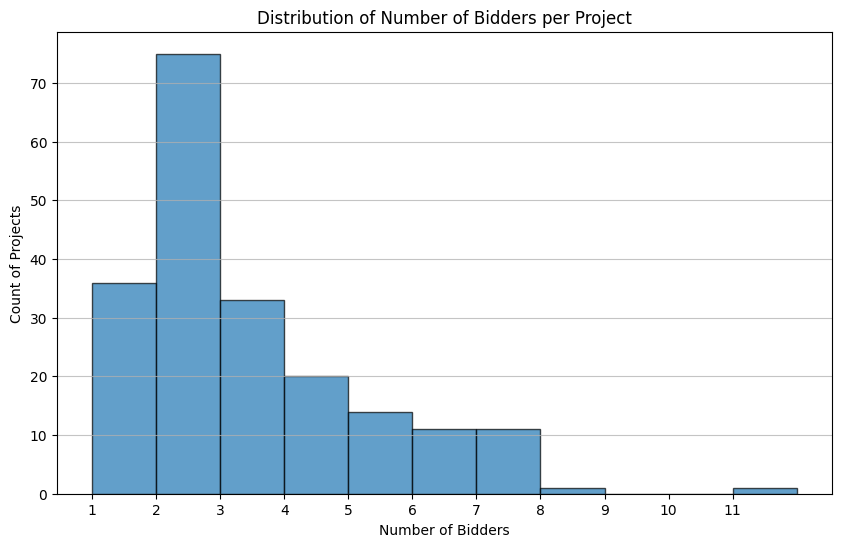

In [13]:
# Analyzing the number of bidders per project
bidders_per_project = df.groupby('project_number').size().reset_index(name='num_bidders')

print(f"Average number of bidders per project: {bidders_per_project['num_bidders'].mean():.2f}")
print(f"Min number of bidders: {bidders_per_project['num_bidders'].min()}")
print(f"Max number of bidders: {bidders_per_project['num_bidders'].max()}")

# Distribution of the number of bidders per project
print("\nDistribution of the number of bidders per project:")
print(bidders_per_project['num_bidders'].value_counts().sort_index())

# Let's visualize this
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(bidders_per_project['num_bidders'], bins=range(1, bidders_per_project['num_bidders'].max()+2), alpha=0.7, edgecolor='black')
plt.title('Distribution of Number of Bidders per Project')
plt.xlabel('Number of Bidders')
plt.ylabel('Count of Projects')
plt.xticks(range(1, bidders_per_project['num_bidders'].max()+1))
plt.grid(axis='y', alpha=0.75)
plt.show()

Average winning bid amount: $2,313,310.05
Average losing bid amount: $2,321,503.07

Percentage of projects where the lowest bidder won: 100.00%


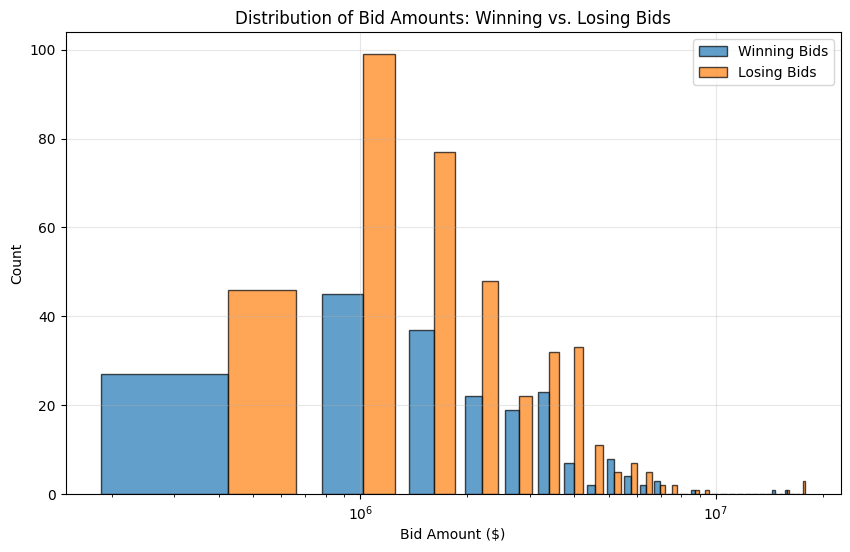

In [14]:
# Analyzing winning bids vs. all bids

# First, let's look at the relationship between bid amount and winning probability
won_bids = df[df['awarded'] == True]
lost_bids = df[df['awarded'] == False]

print(f"Average winning bid amount: ${won_bids['bid_amount'].mean():,.2f}")
print(f"Average losing bid amount: ${lost_bids['bid_amount'].mean():,.2f}")

# Calculate the difference between lowest and winning bid for each project
project_min_bids = df.groupby('project_number')['bid_amount'].min().reset_index()
project_min_bids.columns = ['project_number', 'min_bid']

# Merge with the original dataframe
df_with_min = df.merge(project_min_bids, on='project_number')

# Calculate if the winning bid was the lowest bid
df_with_min['is_lowest'] = df_with_min['bid_amount'] == df_with_min['min_bid']
won_with_min = df_with_min[(df_with_min['awarded'] == True) & (df_with_min['is_lowest'] == True)]

print(f"\nPercentage of projects where the lowest bidder won: {len(won_with_min) / len(won_bids) * 100:.2f}%")

# Let's visualize the distribution of winning vs losing bids
plt.figure(figsize=(10, 6))
plt.hist([won_bids['bid_amount'], lost_bids['bid_amount']], 
         bins=30, alpha=0.7, label=['Winning Bids', 'Losing Bids'], 
         edgecolor='black')
plt.title('Distribution of Bid Amounts: Winning vs. Losing Bids')
plt.xlabel('Bid Amount ($)')
plt.ylabel('Count')
plt.legend()
plt.grid(alpha=0.3)
plt.xscale('log')  # Using log scale as bid amounts may have a wide range
plt.show()

Top 15 most active bidders:
                      bidder_name  total_bids  won_bids  win_rate
                   SHELLY COMPANY         107        46 42.990654
               SHELLY & SANDS INC          86        49 56.976744
KOKOSING CONSTRUCTION COMPANY INC          61        14 22.950820
        CHAGRIN VALLEY PAVING INC          39         6 15.384615
              KARVO COMPANIES INC          36         7 19.444444
BARBICAS CONSTRUCTION COMPANY INC          32         1  3.125000
                RONYAK PAVING INC          23        10 43.478261
      BURTON SCOT CONTRACTORS LLC          22         1  4.545455
                GERKEN PAVING INC          21        12 57.142857
         JOHN R JURGENSEN COMPANY          21         6 28.571429
     BARRETT PAVING MATERIALS INC          19        14 73.684211
                  NLS PAVING, INC          16         1  6.250000
             MELWAY PAVING CO INC          11         2 18.181818
                ERIE BLACKTOP INC          10   

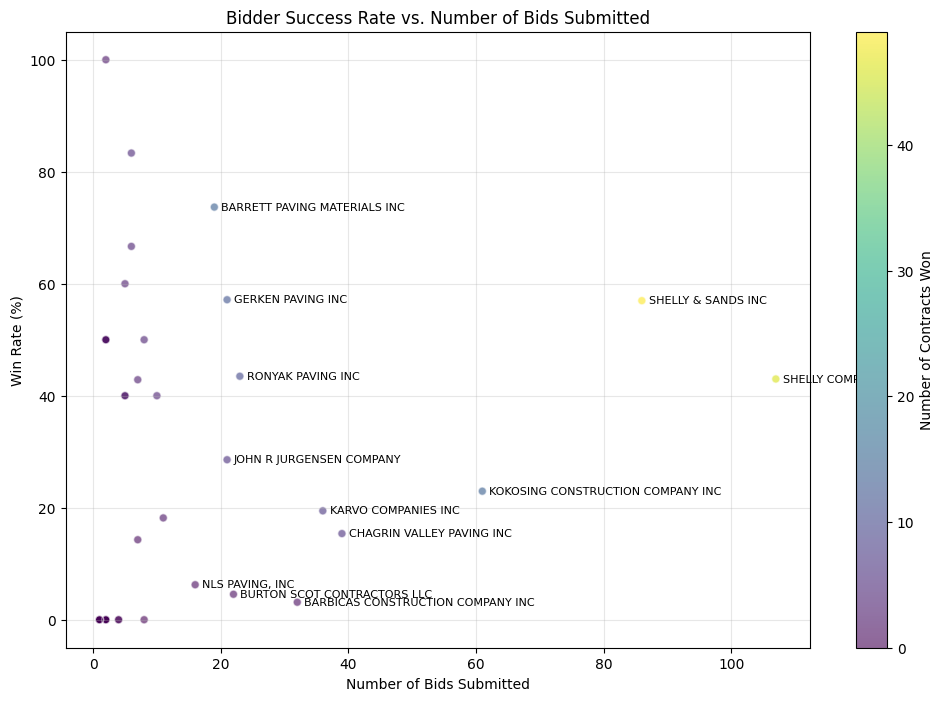

In [15]:
# Analyzing bidder success patterns

# Calculate how many bids each company submitted and won
bidder_stats = df.groupby('bidder_name').agg(
    total_bids=('project_number', 'count'),
    won_bids=('awarded', 'sum'),
).reset_index()

# Calculate win rate for each bidder
bidder_stats['win_rate'] = bidder_stats['won_bids'] / bidder_stats['total_bids'] * 100

# Sort by number of bids submitted
bidder_stats_by_bids = bidder_stats.sort_values('total_bids', ascending=False).reset_index(drop=True)

# Get the top 15 most active bidders
top_bidders = bidder_stats_by_bids.head(15)
print("Top 15 most active bidders:")
print(top_bidders[['bidder_name', 'total_bids', 'won_bids', 'win_rate']].to_string(index=False))

# Find the bidders with the highest win rates (minimum 5 bids)
min_bids = 5
top_win_rate = bidder_stats[bidder_stats['total_bids'] >= min_bids].sort_values('win_rate', ascending=False).head(15)
print(f"\nTop 15 bidders by win rate (minimum {min_bids} bids):")
print(top_win_rate[['bidder_name', 'total_bids', 'won_bids', 'win_rate']].to_string(index=False))

# Visualize the relationship between number of bids and win rate
plt.figure(figsize=(12, 8))
plt.scatter(bidder_stats['total_bids'], bidder_stats['win_rate'], 
           alpha=0.6, edgecolors='w', c=bidder_stats['won_bids'], cmap='viridis')

# Add labels for top bidders
for i, row in bidder_stats[bidder_stats['total_bids'] > 15].iterrows():
    plt.annotate(row['bidder_name'], 
                 xy=(row['total_bids'], row['win_rate']),
                 xytext=(5, 0), textcoords='offset points', 
                 ha='left', va='center', fontsize=8)

plt.colorbar(label='Number of Contracts Won')
plt.title('Bidder Success Rate vs. Number of Bids Submitted')
plt.xlabel('Number of Bids Submitted')
plt.ylabel('Win Rate (%)')
plt.grid(alpha=0.3)
plt.show()

Bid counts and win rates by state:
state  bid_count  won_count  win_rate
   OH        594        202 34.006734
   MO          2          0  0.000000
   PA          1          0  0.000000


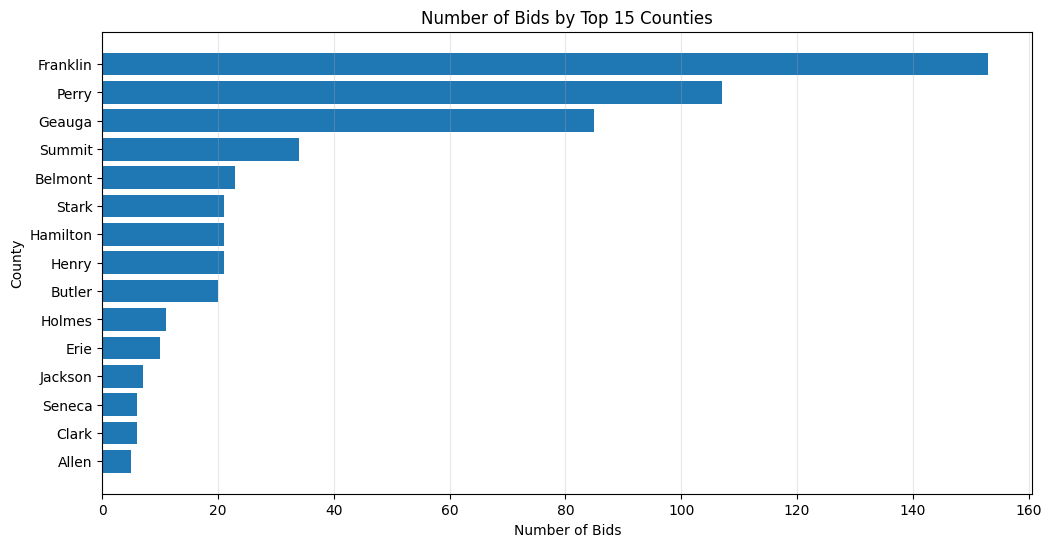

In [16]:
# Analyzing geographical patterns

# Count bids by state
state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'bid_count']

# Count winning bids by state
state_wins = df[df['awarded'] == True]['state'].value_counts().reset_index()
state_wins.columns = ['state', 'won_count']

# Merge the two
state_analysis = state_counts.merge(state_wins, on='state', how='left')
state_analysis['won_count'] = state_analysis['won_count'].fillna(0).astype(int)
state_analysis['win_rate'] = state_analysis['won_count'] / state_analysis['bid_count'] * 100
state_analysis = state_analysis.sort_values('bid_count', ascending=False)

print("Bid counts and win rates by state:")
print(state_analysis.to_string(index=False))

# Analyze county data (if available)
if df['county'].notna().sum() > len(df) * 0.5:  # If at least 50% of county data is available
    county_counts = df['county'].value_counts().reset_index()
    county_counts.columns = ['county', 'bid_count']
    
    # Only look at top 15 counties
    plt.figure(figsize=(12, 6))
    top_counties = county_counts.head(15)
    plt.barh(top_counties['county'], top_counties['bid_count'])
    plt.title('Number of Bids by Top 15 Counties')
    plt.xlabel('Number of Bids')
    plt.ylabel('County')
    plt.gca().invert_yaxis()  # To have the highest count at the top
    plt.grid(axis='x', alpha=0.3)
    plt.show()

Analysis by project size:
              num_projects  avg_bidders  avg_bid_amount  max_bid_amount  min_bid_amount
project_size                                                                           
Small                   51     2.980392    7.145692e+05      1213181.24       126969.50
Medium-Small            50     3.540000    1.431014e+06      2154740.75       923404.60
Medium-Large            50     2.640000    2.529915e+06      3952319.30      1698654.55
Large                   51     2.666667    5.061982e+06     17925994.04      3042424.93


C:\Users\clint\AppData\Local\Temp\ipykernel_15544\376217534.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_competition = df_with_size.groupby('project_size').agg(


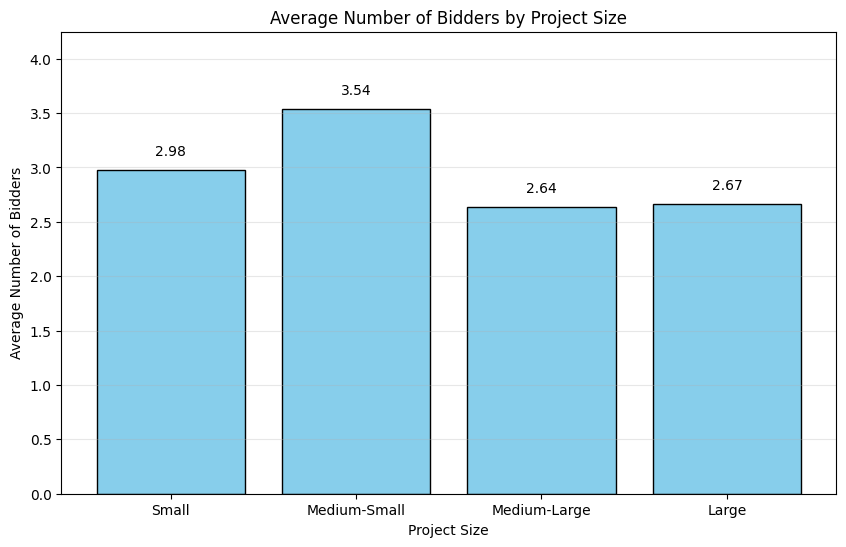

In [17]:
# Analyzing bid amounts by project size

# First, calculate average bid amount per project to determine project size
project_avg_bids = df.groupby('project_number')['bid_amount'].mean().reset_index()
project_avg_bids.columns = ['project_number', 'avg_bid_amount']

# Create project size categories
quantiles = project_avg_bids['avg_bid_amount'].quantile([0, 0.25, 0.5, 0.75, 1]).values
size_labels = ['Small', 'Medium-Small', 'Medium-Large', 'Large']

# Cut the data into categories
project_avg_bids['project_size'] = pd.cut(
    project_avg_bids['avg_bid_amount'], 
    bins=quantiles, 
    labels=size_labels, 
    include_lowest=True
)

# Merge back with original dataframe
df_with_size = df.merge(project_avg_bids[['project_number', 'project_size']], on='project_number')

# Analyze bidding competitiveness by project size
size_competition = df_with_size.groupby('project_size').agg(
    num_projects=pd.NamedAgg(column='project_number', aggfunc='nunique'),
    avg_bidders=pd.NamedAgg(column='project_number', aggfunc=lambda x: len(x)/len(x.unique())),
    avg_bid_amount=pd.NamedAgg(column='bid_amount', aggfunc='mean'),
    max_bid_amount=pd.NamedAgg(column='bid_amount', aggfunc='max'),
    min_bid_amount=pd.NamedAgg(column='bid_amount', aggfunc='min')
)

print("Analysis by project size:")
print(size_competition.to_string())

# Visualize the average number of bidders by project size
plt.figure(figsize=(10, 6))
barplot = plt.bar(size_competition.index, size_competition['avg_bidders'], color='skyblue', edgecolor='black')

# Add labels on top of bars
for bar in barplot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')

plt.title('Average Number of Bidders by Project Size')
plt.xlabel('Project Size')
plt.ylabel('Average Number of Bidders')
plt.ylim(0, size_competition['avg_bidders'].max() * 1.2)  # Add some space above the bars
plt.grid(axis='y', alpha=0.3)
plt.show()